# INSTALLATION

In [2]:
!git clone https://github.com/WXinlong/SOLO.git

fatal: destination path 'SOLO' already exists and is not an empty directory.


In [ ]:
%cd SOLO

In [ ]:
!rm -rf /usr/local/cuda

In [ ]:
!ln -s /usr/local/cuda-10.1 /usr/local/cuda

In [ ]:
!stat /usr/local/cuda

In [ ]:
!pip install -r requirements/build.txt

In [ ]:
!pip install torchvision==0.5.0

In [ ]:
!pip install "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

In [ ]:
!pip install mmcv==1.4.0

In [ ]:
!pip install mmdet

In [ ]:
!python setup.py develop

In [ ]:
!MMCV_WITH_OPS=1 MMCV_CUDA_ARGS='-gencode=arch=compute_80,code=sm_80' pip install -e .

# Adjustments For custom training 

##### Create these folders under SOLO 


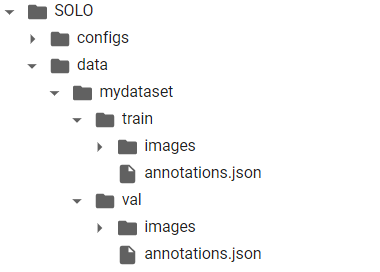

##### Create my_dataset.py under mmdet/datasets

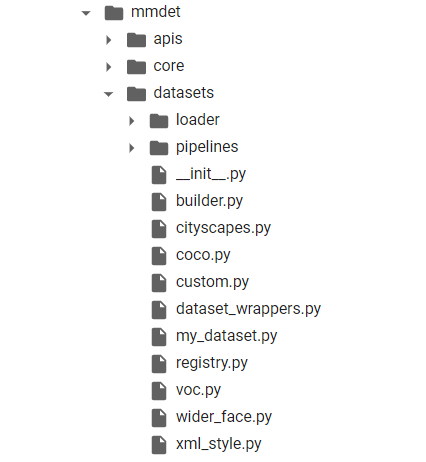

Inside my_dataset.py: 

```py
from .coco import CocoDataset
from .registry import DATASETS
@DATASETS.register_module
class MyDataset(CocoDataset):
    CLASSES = ['Your', 'Classes']
```



Under mmdet/datasets edit `__init__.py`

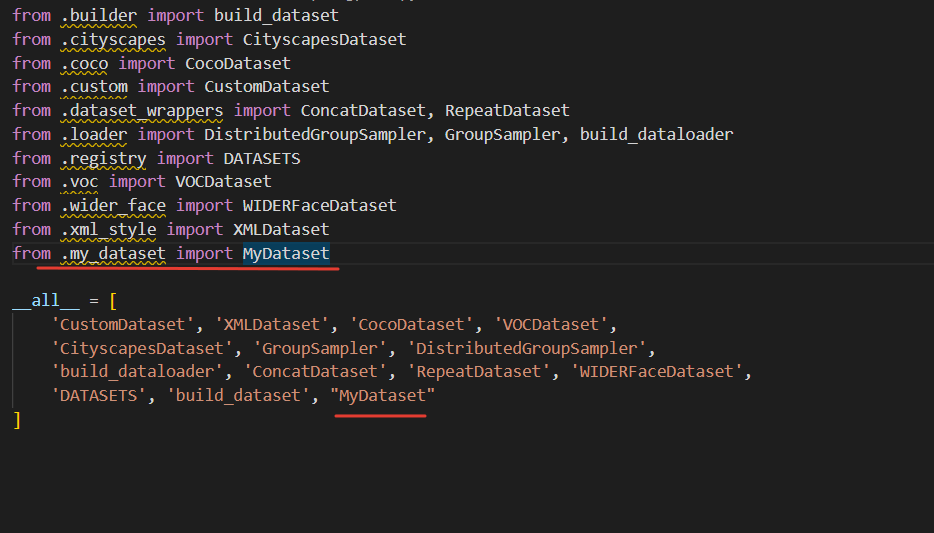

##### Edit your config file.

Edit your number of classes 

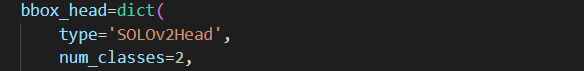

Edit dataset settings 

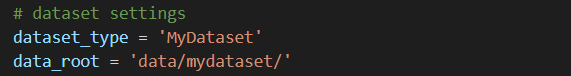

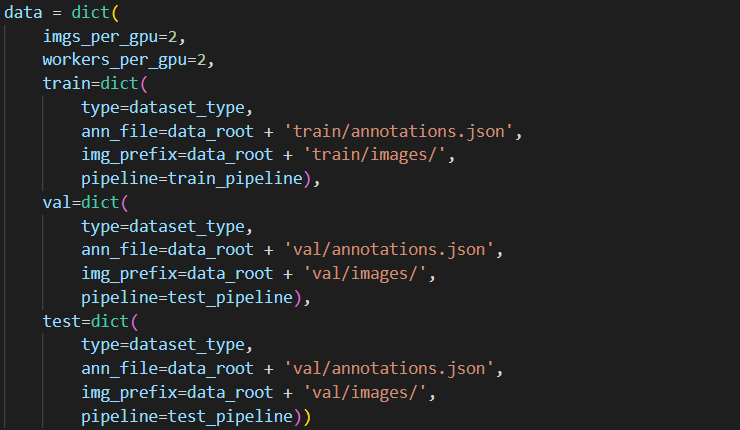

Runtime settings 

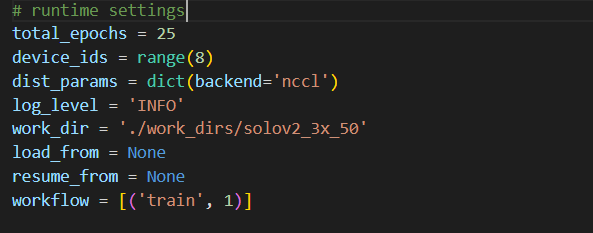

# Train, Test, Test_vis

In [ ]:
!python tools/train.py configs/solov2/solov2_r50_fpn_8gpu_3x.py

In [ ]:
!python tools/test_ins.py configs/solo/solo_r50_fpn_8gpu_1x.py work_dirs/solo_release_r50_fpn_8gpu_1x/epoch_100.pth --show --out  res_.pkl --eval segm

In [ ]:
!python tools/test_ins_vis.py  configs/solov2/solov2_r50_fpn_8gpu_1x.py work_dirs/solov2_3x_50/epoch_25.pth --show --save_dir  /content/